In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("./caliper_output/*/**/*.cali", recursive=True))
print(tk.tree(metric_column='Avg time/rank'))

(2/2) Creating Thicket: 100%|██████████| 1452/1452 [00:52<00:00, 27.45it/s]

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

55.425 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
172.067 main
├─ 137.520 comm
│  ├─ 137.350 comm_large
│  │  ├─ nan MPI_Alltoall
│  │  ├─ nan MPI_Alltoallv
│  │  ├─ nan MPI_Gather
│  │  ├─ 68.791 MPI_Recv
│  │  ├─ 68.260 MPI_Send
│  │  └─ nan MPI_Sendrecv
│  └─ 0.171 comm_small
│     ├─ nan MPI_Allreduce
│     ├─ 0.169 MPI_Bcast
│     ├─ 0.001 MPI_Gather
│     └─ nan MPI_Sendrecv
├─ 27.400 comp
│  ├─ 27.400 comp_large
│  └─ 0.000 comp_small
├─ 6.762 correctness_check
│  ├─ nan MPI_Recv
│  ├─ nan MPI_Send
│  └─ 6.591 comm
│     └─ 6.591 comm_small
│        ├─ 6.598 MPI_Recv
│        └─ 0.000 MPI_Send
└─ 0.278 data_init_runtime
   ├─ 0.278 data_init_runtime
   └─ nan data_perturbed_init_runtime
      └─ nan data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 17

View Calltree

In [3]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()
tk.show_metric_columns()

df = tk.dataframe.reset_index()
df.head(25)

,node,num_procs,input_size,input_type,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),name,Min L1 misses/rank (exc),Max L1 misses/rank (exc),Avg L1 misses/rank (exc),Total L1 misses (exc),Min L2 misses/rank (exc),Max L2 misses/rank (exc),Avg L2 misses/rank (exc),Total L2 misses (exc),Min L1 misses/rank,Max L1 misses/rank,Avg L1 misses/rank,Total L1 misses,Min L2 misses/rank,Max L2 misses/rank,Avg L2 misses/rank,Total L2 misses,algorithm
0,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,1_perc_perturbed,3747638465,22.0,regionprofile,0.001309,0.001431,0.001370,0.002740,0.000000,1.0,1.0,1.0,2.0,0.001309,0.001431,0.001370,0.002740,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,radix
1,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,1_perc_perturbed,3832825424,23.0,regionprofile,0.000132,0.000358,0.000245,0.000490,0.000000,1.0,1.0,1.0,2.0,0.000132,0.000358,0.000245,0.000490,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merge
2,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,1_perc_perturbed,4077066734,24.0,regionprofile,0.000101,0.000191,0.000146,0.000292,0.000000,1.0,1.0,1.0,2.0,0.000101,0.000191,0.000146,0.000292,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sample
3,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,Random,1199586907,23.0,regionprofile,0.000107,0.005971,0.003039,0.006077,0.000009,1.0,1.0,1.0,2.0,0.000107,0.005971,0.003039,0.006077,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sample
4,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,Random,3618688829,21.0,regionprofile,0.000081,0.000763,0.000422,0.000844,0.000000,1.0,1.0,1.0,2.0,0.000081,0.000763,0.000422,0.000844,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,radix
5,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,Random,3979546924,22.0,regionprofile,0.002322,0.002385,0.002353,0.004707,0.000000,1.0,1.0,1.0,2.0,0.002322,0.002385,0.002353,0.004707,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merge
6,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,ReverseSorted,1519969400,23.0,regionprofile,0.000109,0.002283,0.001196,0.002392,0.000001,1.0,1.0,1.0,2.0,0.000109,0.002283,0.001196,0.002392,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sample
7,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,ReverseSorted,2567661575,22.0,regionprofile,0.000148,0.000283,0.000215,0.000431,0.000000,1.0,1.0,1.0,2.0,0.000148,0.000283,0.000215,0.000431,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merge
8,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,ReverseSorted,4025525418,21.0,regionprofile,0.000090,0.000141,0.000116,0.000231,0.000000,1.0,1.0,1.0,2.0,0.000090,0.000141,0.000116,0.000231,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,radix
9,"{'name': 'MPI_Comm_dup', 'type': 'function'}",2,32768,Sorted,1342016867,21.0,regionprofile,0.001335,0.001385,0.001360,0.002721,0.000000,1.0,1.0,1.0,2.0,0.001335,0.001385,0.001360,0.002721,MPI_Comm_dup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,radix


In [4]:
algs = ["radix", "merge", "sample"]
df['input_size'] = df.apply(
    lambda row: row['input_size'] * row['num_procs'] if row['algorithm'] in algs else row['input_size'],
    axis=1
)

# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 1024]
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [16, 18, 20, 22, 24, 26, 28]
input_types = ["Sorted", "1_perc_perturbed", "Random", "ReverseSorted"]

# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [18]:
# def plot_mpl(df, title, xlabel, ylabel):
#     fig = plt.figure(figsize=(15,7))
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(
#         df,
#         marker='o',
#         linestyle="--"
#     )
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     plt.xscale("log", base=2)
#     plt.xticks(threads)
#     ax.set_xticklabels(threads)
#     ax.set_ylim(bottom=0, top=None)
#     plt.show()
#     return fig, ax

def plot_mpl(df, title, xlabel, ylabel):
    df = df.drop("column", axis=1)
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Plot each column with the column name as the label
    for column in df.columns:
        ax.plot(
            df.index,        # X-axis values: process counts (index of df)
            df[column],      # Y-axis values: time data for each column
            marker='o',
            linestyle="--",
            label=column     # Use column name as the label
        )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
#     ax.set_xscale("log", base=2)
#     ax.set_xticks(df.index)             # Ensure xticks match process counts
#     ax.set_ylim(bottom=0)
#     ax.legend(title="Algorithm")        # Add legend with column names
    plt.legend()
    plt.show()
    
    return fig, ax

In [19]:
def comps(df, name, input_type, input_size, stat):
    temp_df = df[(df["name"] == name) & (df["input_type"] == input_type) & (df["input_size"] == input_size)]
    temp_df = temp_df.loc[:, [stat, "num_procs", "input_size", "input_type", "algorithm"]]

    # Pivot the table and replace NaN values
    temp_pivot = temp_df.pivot_table(index='algorithm', columns='num_procs', values=stat, aggfunc="sum")
    temp_pivot = temp_pivot.reset_index().set_index("algorithm")

    # Plot the transposed DataFrame
    plot_mpl(
        temp_pivot.transpose(),
        title=f"{name} {stat}, {input_type} data",
        xlabel="Processes",
        ylabel="Time (seconds)",
    )

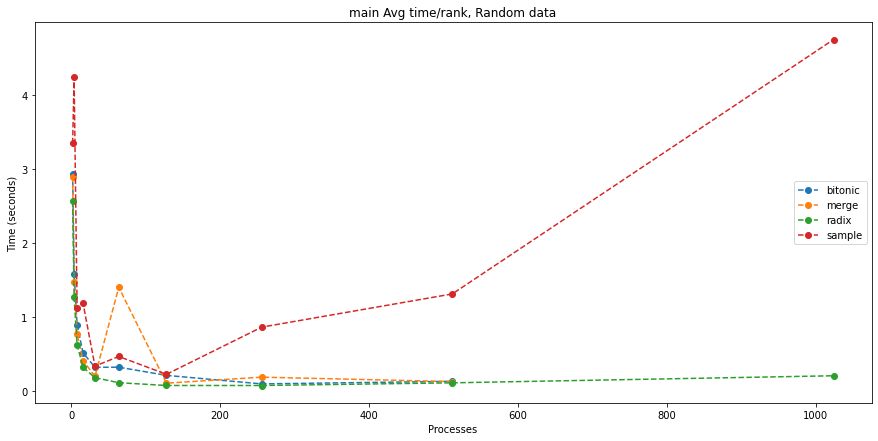

In [20]:
comps(df, "main", "Random", 16777216, "Avg time/rank")

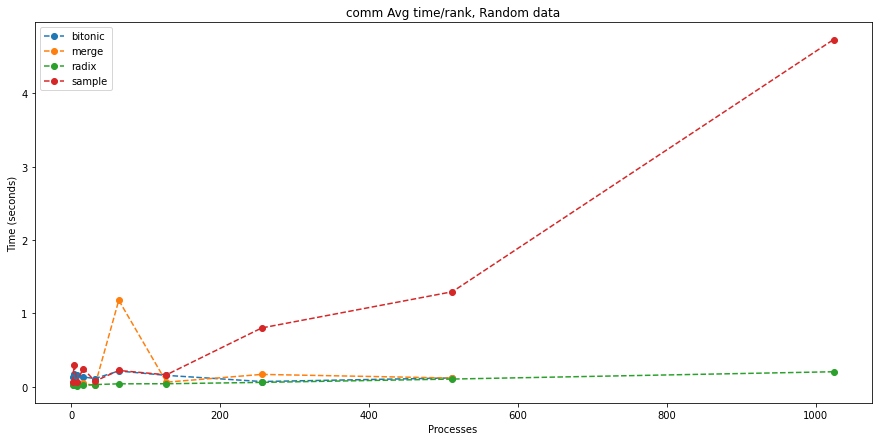

In [21]:
comps(df, "comm", "Random", 16777216, "Avg time/rank")

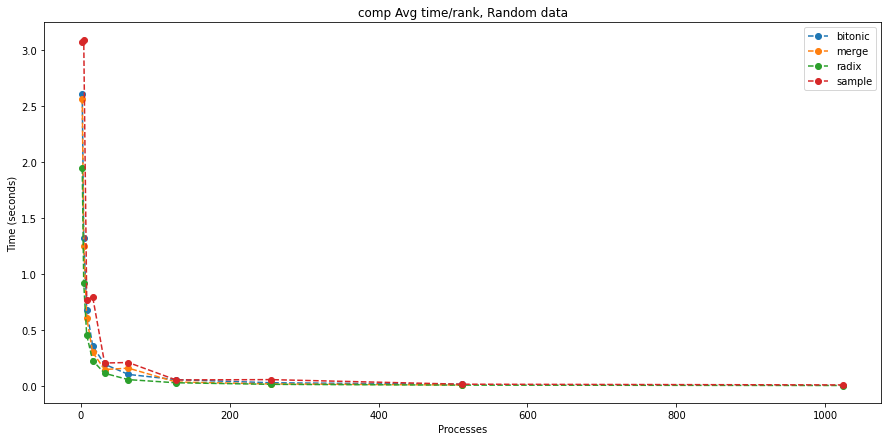

In [22]:
comps(df, "comp", "Random", 16777216, "Avg time/rank")

(2/2) Creating Thicket: 100%|██████████| 47/47 [00:01<00:00, 30.91it/s]


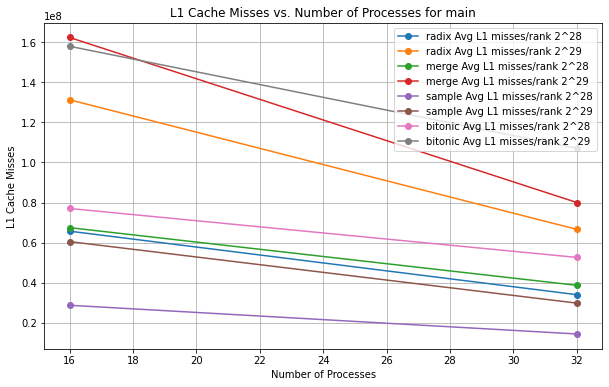

In [23]:
tk = th.Thicket.from_caliperreader(glob("caliper_output/cache_miss/*/*.cali"))
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()
tk.show_metric_columns()

df = tk.dataframe.reset_index()

temp_df = df[(df["name"] == "main") & (df["input_type"] == "Random") & (df["input_size"] == 16777216)]
temp_df = temp_df.loc[:, ["Avg L1 misses/rank", "num_procs", "input_size", "input_type", "algorithm"]]

sizes = {2**28:"2^28", 2**29:"2^29"}
plt.figure(figsize=(10, 6))

alg = ["radix", "merge", "sample", "bitonic"]
for i in alg:
    for k in sizes:
        df1 = df[(df["name"] == "main") & (df["input_type"] == "Random") & (df["input_size"] == k) & (df["algorithm"] == i)]
        plt.plot(df1['num_procs'], df1[f'Avg L1 misses/rank'], label=f'{i} Avg L1 misses/rank {sizes[k]}', marker='o')
    
plt.xlabel('Number of Processes')
plt.ylabel(f'L1 Cache Misses')
plt.title(f'L1 Cache Misses vs. Number of Processes for main')
plt.legend()
plt.grid(True)

plt.show()

(2/2) Creating Thicket: 100%|██████████| 47/47 [00:01<00:00, 31.08it/s]


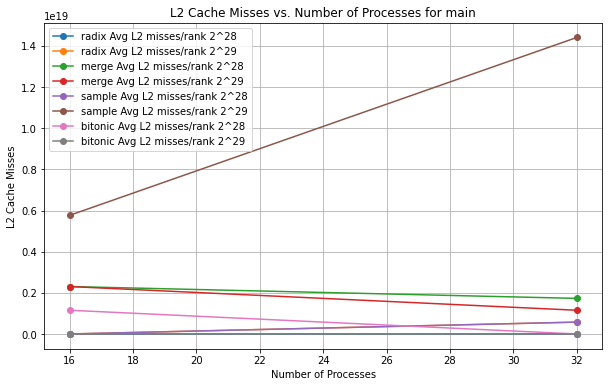

In [24]:
tk = th.Thicket.from_caliperreader(glob("caliper_output/cache_miss/*/*.cali"))
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()
tk.show_metric_columns()

df = tk.dataframe.reset_index()

temp_df = df[(df["name"] == "main") & (df["input_type"] == "Random") & (df["input_size"] == 16777216)]
temp_df = temp_df.loc[:, ["Avg L2 misses/rank", "num_procs", "input_size", "input_type", "algorithm"]]

sizes = {2**28:"2^28", 2**29:"2^29"}
plt.figure(figsize=(10, 6))

alg = ["radix", "merge", "sample", "bitonic"]
for i in alg:
    for k in sizes:
        df1 = df[(df["name"] == "main") & (df["input_type"] == "Random") & (df["input_size"] == k) & (df["algorithm"] == i)]
        plt.plot(df1['num_procs'], df1[f'Avg L2 misses/rank'], label=f'{i} Avg L2 misses/rank {sizes[k]}', marker='o')
    
plt.xlabel('Number of Processes')
plt.ylabel(f'L2 Cache Misses')
plt.title(f'L2 Cache Misses vs. Number of Processes for main')
plt.legend()
plt.grid(True)

plt.show()